## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
my_df = pd.read_csv(r"C:\Users\HP\Desktop\DataScience - DT\DSData-master\census_income.csv")
my_df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


## Exploratory Data Analysis

In [3]:
my_df.shape

(32560, 15)

In [4]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
my_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
my_df['predclass'] = my_df['Income']
del my_df['Income']
my_df['education-num'] = my_df['Education_num']
del my_df['Education_num']

In [7]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Marital_status  32560 non-null  object
 5   Occupation      32560 non-null  object
 6   Relationship    32560 non-null  object
 7   Race            32560 non-null  object
 8   Sex             32560 non-null  object
 9   Capital_gain    32560 non-null  int64 
 10  Capital_loss    32560 non-null  int64 
 11  Hours_per_week  32560 non-null  int64 
 12  Native_country  32560 non-null  object
 13  predclass       32560 non-null  object
 14  education-num   32560 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
print('Details of the Workclass column\n',my_df.Workclass.unique(),'\n')
print('Details of the Education column\n',my_df.Education.unique(),'\n')
print('Details of the Marital_status column\n',my_df['Marital_status'].unique(),'\n')
print('Details of the Occupation column\n',my_df.Occupation.unique(),'\n')
print('Details of the Relationship column\n',my_df.Relationship.unique(),'\n')
print('Details of the Race column\n',my_df.Race.unique(),'\n')
print('Details of the Sex column\n',my_df.Sex.unique(),'\n')
print('Details of the Native_country column\n',my_df['Native_country'].unique(),'\n')
print('Details of the predclass column\n',my_df.predclass.unique(),'\n')

Details of the Workclass column
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Details of the Education column
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Details of the Marital_status column
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Details of the Occupation column
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv'] 

Details of the Relationship column
 [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Details of the Race column
 [' White' 

In [9]:
my_df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
predclass         0
education-num     0
dtype: int64

In [10]:
my_df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
my_df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
my_df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Looking at the features - Workclass,Native_country, and Occupation - we see that a considerable number of columns have missing values which is indicated by ? and we need to handle this or consider it before making the machine learning algorithm. 

Let us study the columns for more detailed information

### Predclass

<AxesSubplot:xlabel='predclass', ylabel='count'>

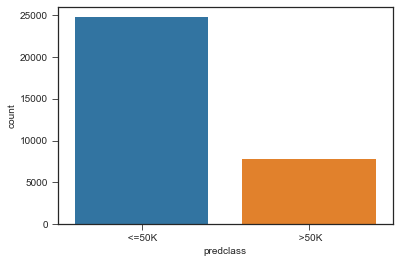

In [13]:
#Lets study the target column
plt.style.use('seaborn-ticks')
sns.countplot(x="predclass", data=my_df)

People with Income level less than 50K(75% of the dataset) is more than 3 times those with income level above 50K(25% of the dataset), indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group. 

### Education

In [14]:
my_df[['Education', 'education-num']].groupby(['Education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,Education,education-num
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


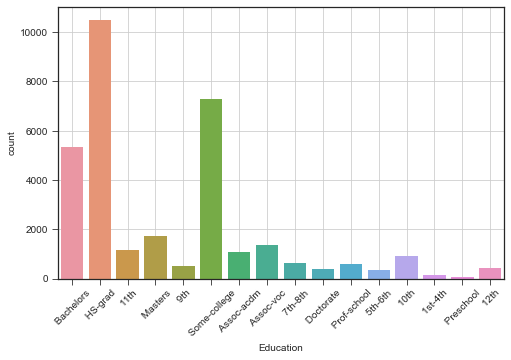

In [15]:
fig = plt.figure(figsize=(8,5))
plt.style.use('seaborn-ticks')
sns.countplot(x="Education", data=my_df)
plt.xticks(rotation=45)
plt.grid(True)

In [16]:
#Changing values in the education field by replacing the columns to make analysis easier
my_df['Education'].replace('Preschool', 'dropout',inplace=True)
my_df['Education'].replace('1st-4th', 'dropout',inplace=True)
my_df['Education'].replace('5th-6th', 'dropout',inplace=True)
my_df['Education'].replace('7th-8th', 'dropout',inplace=True)
my_df['Education'].replace('9th', 'dropout',inplace=True)
my_df['Education'].replace('10th', 'dropout',inplace=True)
my_df['Education'].replace('11th', 'dropout',inplace=True)
my_df['Education'].replace('12th', 'dropout',inplace=True)

my_df['Education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['Education'].replace('HS-grad', 'HighGrad',inplace=True)

my_df['Education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['Education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['Education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)

my_df['Education'].replace('Bachelors', 'Bachelors',inplace=True)

my_df['Education'].replace('Masters', 'Masters',inplace=True)
my_df['Education'].replace('Prof-school', 'Masters',inplace=True)

my_df['Education'].replace('Doctorate', 'Doctorate',inplace=True)

We are able to understand the split of the education level and this could be important as it helps us acertain how capable a person is. A majority of people in this dataset have graduated high school(HS-Grad) or done a basic college degree(Some-college,Assoc-acdm, or Assoc-voc). This goes to show that a majority of people have a basic education level required in order to perform most jobs with ease.

### Marital-status

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

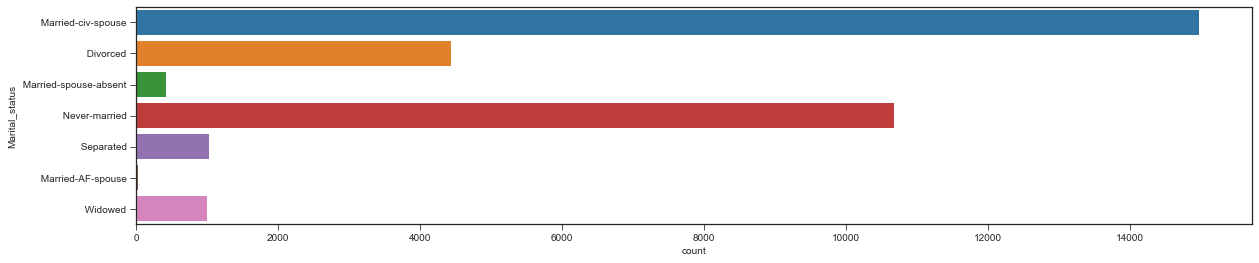

In [17]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="Marital_status", data=my_df)

In [18]:
my_df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [19]:
#Changing values in the Marital-status field by replacing the columns to make analysis easier
my_df['Marital_status'].replace('Never-married', 'Single',inplace=True)
my_df['Marital_status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['Marital_status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['Marital_status'].replace(['Married-spouse-absent'], 'Married',inplace=True)
my_df['Marital_status'].replace(['Separated'], 'Separated',inplace=True)
my_df['Marital_status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['Marital_status'].replace(['Widowed'], 'Widowed',inplace=True)

We are able to understand the split of the Marital-status level and this could be important as a married person is more likely to do jobs that pay the rent. 

    45% of the people in the dataset are married
    30% of the people in the dataset have never been married.
    
The remainder of the people in this group are split accross being divorced/widowed/seperated

### Occupation

<AxesSubplot:xlabel='count', ylabel='Occupation'>

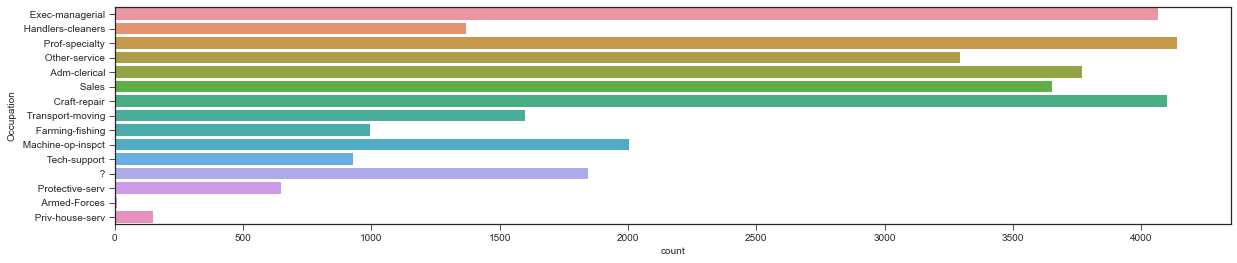

In [20]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="Occupation", data=my_df)


In [21]:
my_df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [22]:
pd.crosstab(my_df.Occupation,my_df.predclass)

predclass,<=50K,>50K
Occupation,,
?,1652,191
Adm-clerical,3262,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


Here, we detail the kind of jobs that are currently being done by the people in the dataset and this can help us understand how these people fare with salary. For instance,

    1. Craft Repair, Adm-clerical, Handlers-cleaners, Other-service and Machine-op-inspct are relatively low paying jobs as a majority of the people in that group earn below 50k.
    2. There are atleast 1800 people whose job description is not known, almost 90% of that list are below the 50k barrier
    3. Managerial positions are a 50-50 as more than half of the people holding manegerial positions still get less than 50k



### Workclass

<AxesSubplot:xlabel='Workclass', ylabel='count'>

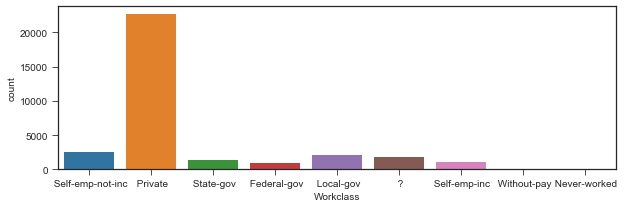

In [23]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,3)) 
sns.countplot(x="Workclass", data=my_df)

In [24]:
my_df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [25]:
pd.crosstab(my_df.Workclass,my_df.predclass)

predclass,<=50K,>50K
Workclass,,
?,1645,191
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,944,353
Without-pay,14,0


Looking at the workclass, we are able to establish that a vast majority of the population work in the private sector. For the rest of people who aren't in the private sector, there is a very small percntage who are self employed. In self-employed inviduals the self-emp-inc are slightly better than the self-emp-not-inc

### Age

In [26]:
# Using age_bin function in pandas, we are going to bin the hours/week in equally sized buckets
my_df['age_bin'] = pd.cut(my_df['Age'], 25)

<AxesSubplot:xlabel='count', ylabel='age_bin'>

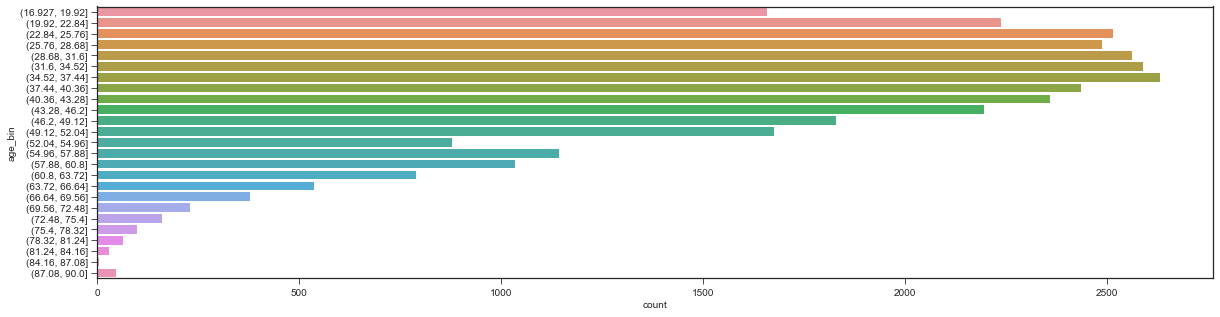

In [27]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="age_bin", data=my_df)

In [28]:
my_df['age_bin'].value_counts()

(34.52, 37.44]     2632
(31.6, 34.52]      2589
(28.68, 31.6]      2562
(22.84, 25.76]     2516
(25.76, 28.68]     2487
(37.44, 40.36]     2436
(40.36, 43.28]     2358
(19.92, 22.84]     2238
(43.28, 46.2]      2195
(46.2, 49.12]      1828
(49.12, 52.04]     1675
(16.927, 19.92]    1657
(54.96, 57.88]     1143
(57.88, 60.8]      1033
(52.04, 54.96]      879
(60.8, 63.72]       788
(63.72, 66.64]      536
(66.64, 69.56]      379
(69.56, 72.48]      228
(72.48, 75.4]       160
(75.4, 78.32]        98
(78.32, 81.24]       64
(87.08, 90.0]        46
(81.24, 84.16]       28
(84.16, 87.08]        5
Name: age_bin, dtype: int64

In [29]:
my_df[['predclass', 'Age']].groupby(['predclass']).mean().sort_values(by='Age')

,Age
predclass,
<=50K,36.783648
>50K,44.249841


### Race

<AxesSubplot:xlabel='Race', ylabel='count'>

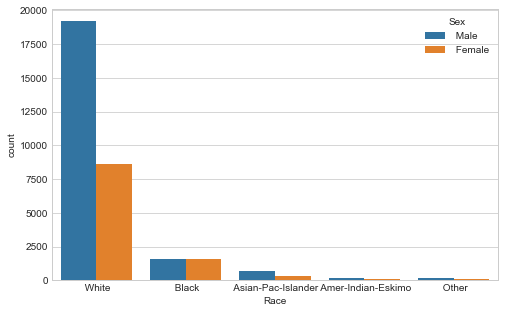

In [30]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "Race", "prop", "Sex"
plt.figure(figsize=(8,5)) 
#f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df)#, ax=axes[0])

<AxesSubplot:xlabel='Race', ylabel='prop'>

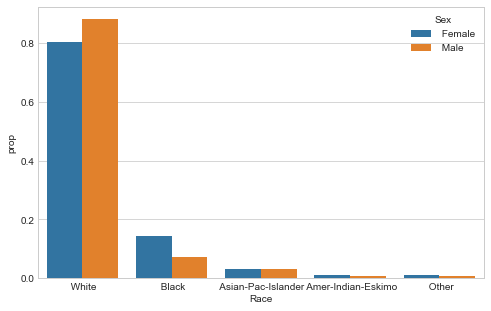

In [31]:
plt.figure(figsize=(8,5)) 
prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)

### Hours of Work 

In [32]:
# Using cut function in pandas, we are going to bin the hours/week in equally sized buckets
my_df['hours-per-week_bin'] = pd.cut(my_df['Hours_per_week'], 10)
my_df['hours-per-week'] = my_df['Hours_per_week']

(20.0, 60.0)

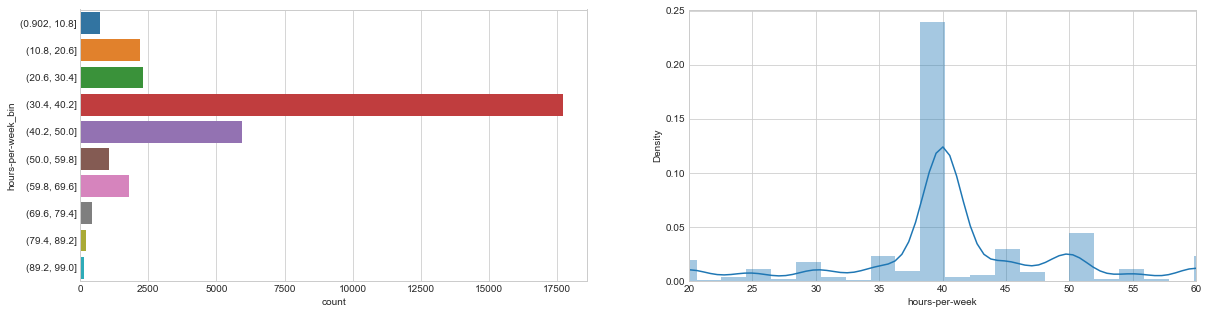

In [33]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
#sns.distplot(my_df[my_df['predclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
#sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

In [34]:
my_df['hours-per-week_bin'].value_counts()

(30.4, 40.2]     17734
(40.2, 50.0]      5938
(20.6, 30.4]      2317
(10.8, 20.6]      2192
(59.8, 69.6]      1796
(50.0, 59.8]      1058
(0.902, 10.8]      736
(69.6, 79.4]       448
(79.4, 89.2]       202
(89.2, 99.0]       139
Name: hours-per-week_bin, dtype: int64

### Create a crossing feature: Age + hours of work in a week

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

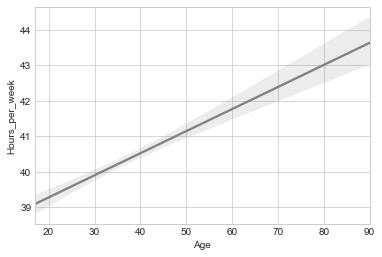

In [35]:
#g = sns.jointplot(x = 'age', y = 'hours-per-week',data = my_df, kind = 'hex', cmap= 'hot', size=10)
sns.regplot(my_df.Age, my_df['Hours_per_week'],scatter=False,color='grey')

In [36]:
my_df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,predclass,education-num,age_bin,hours-per-week_bin,hours-per-week
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,13,"(49.12, 52.04]","(10.8, 20.6]",13
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,9,"(37.44, 40.36]","(30.4, 40.2]",40
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,7,"(52.04, 54.96]","(30.4, 40.2]",40
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,13,"(25.76, 28.68]","(30.4, 40.2]",40
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,14,"(34.52, 37.44]","(30.4, 40.2]",40


In [37]:
# Crossing Numerical Features
my_df['age-hours'] = my_df['Age']*my_df['Hours_per_week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

<AxesSubplot:xlabel='count', ylabel='age-hours_bin'>

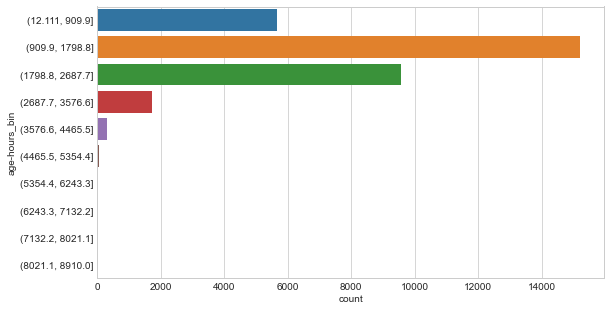

In [38]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=my_df)

### Pair Plot

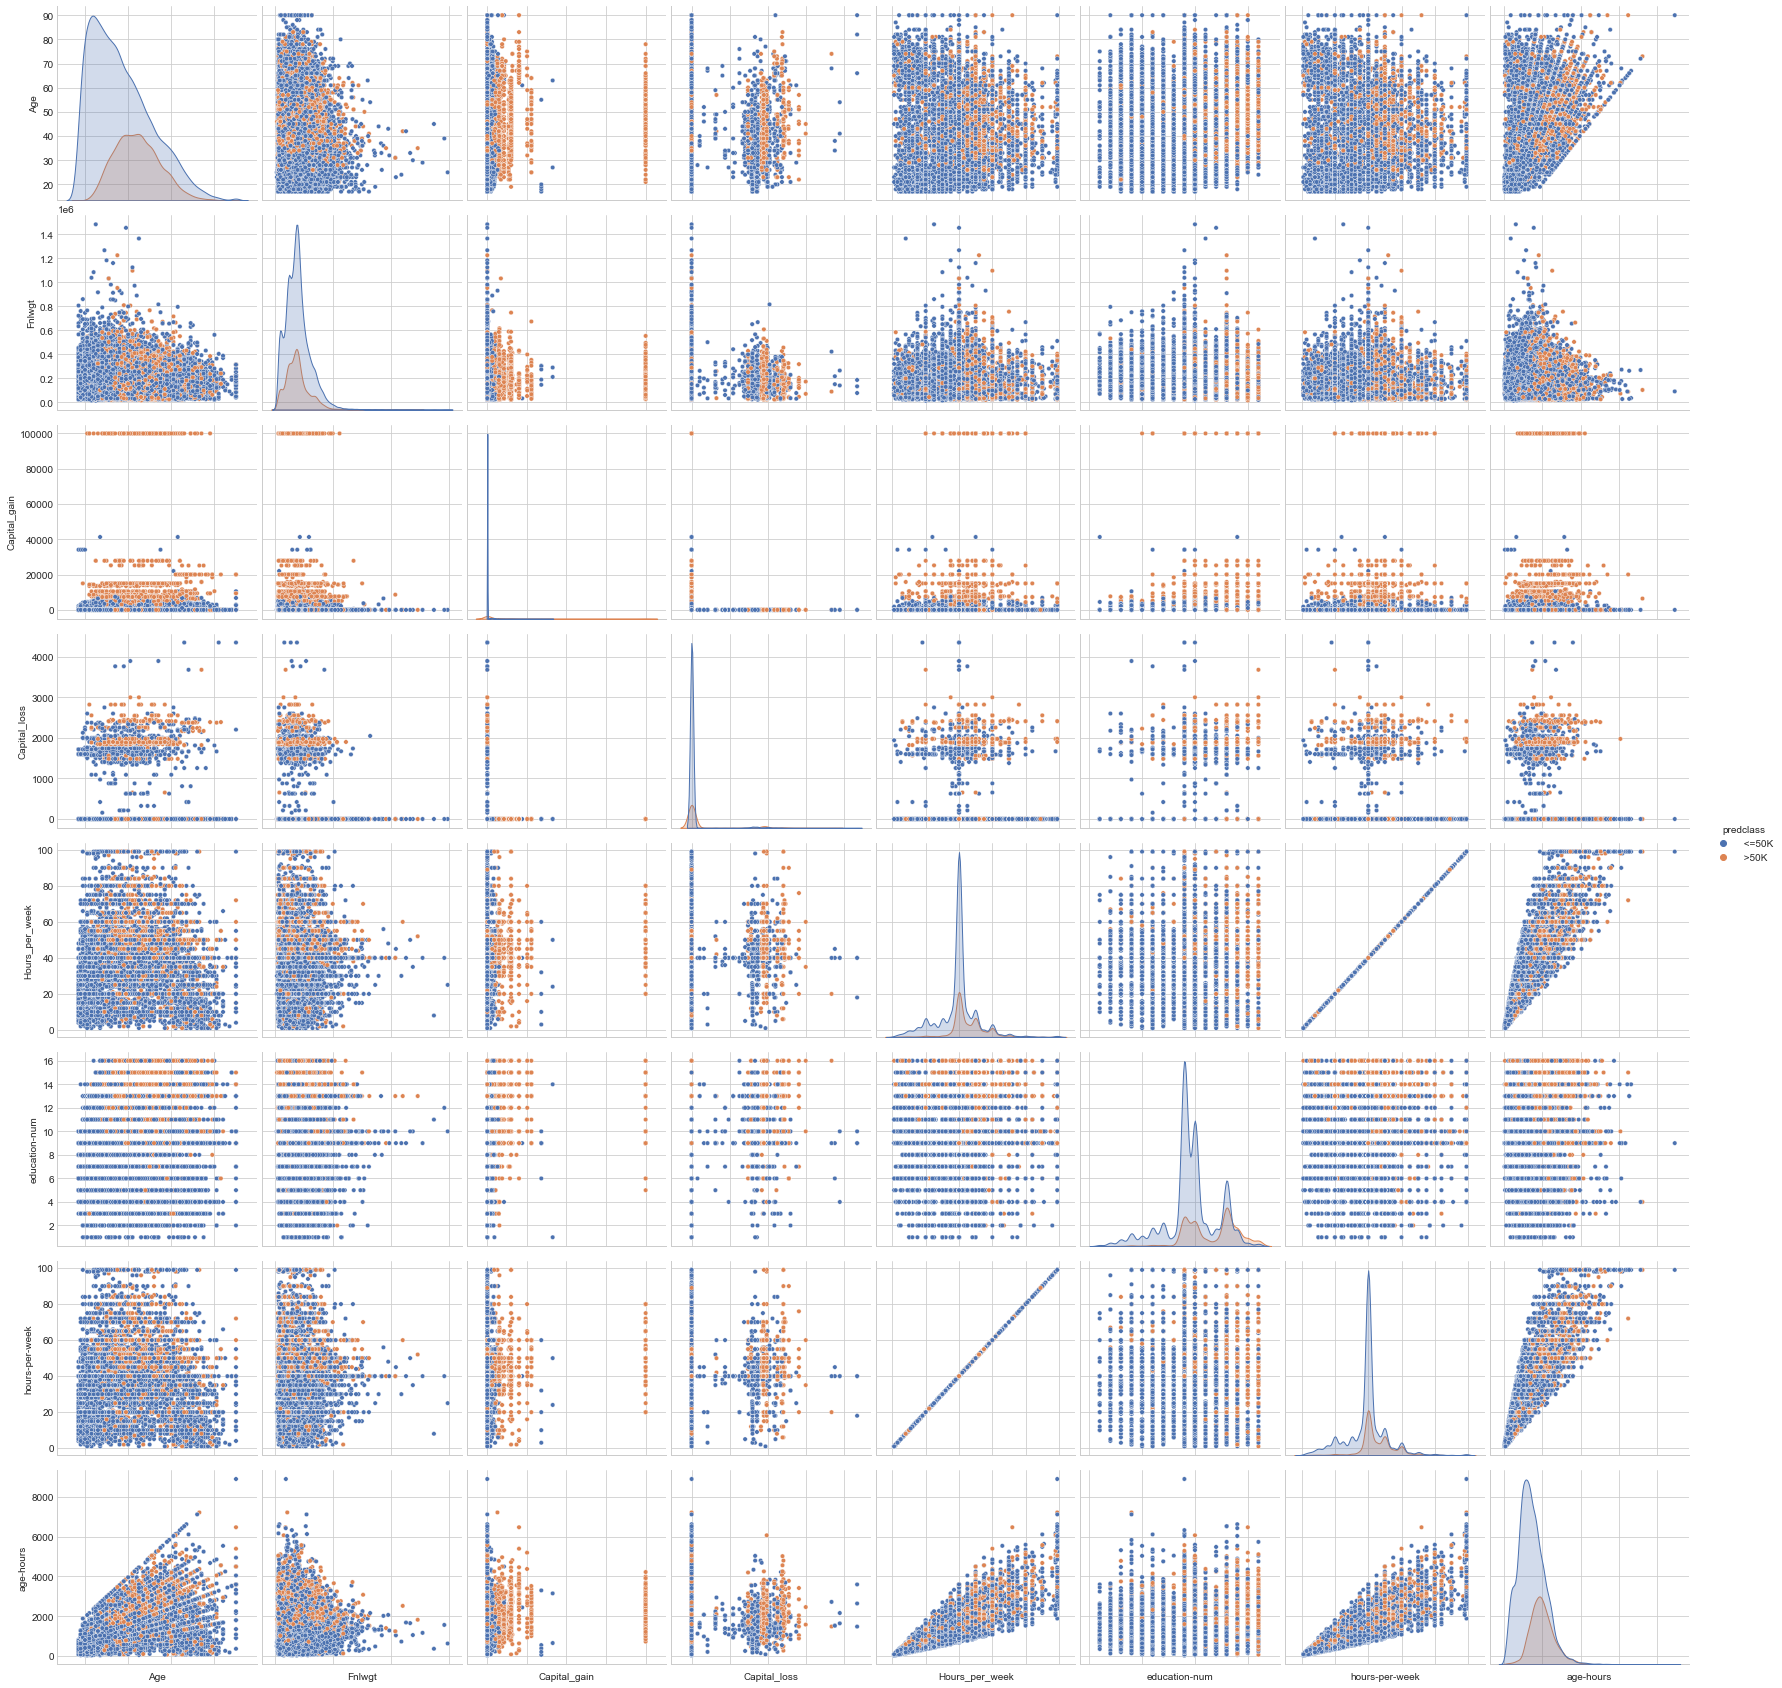

In [39]:
#pair plots of entire dataset
pp = sns.pairplot(my_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

### Correlation Heatmap

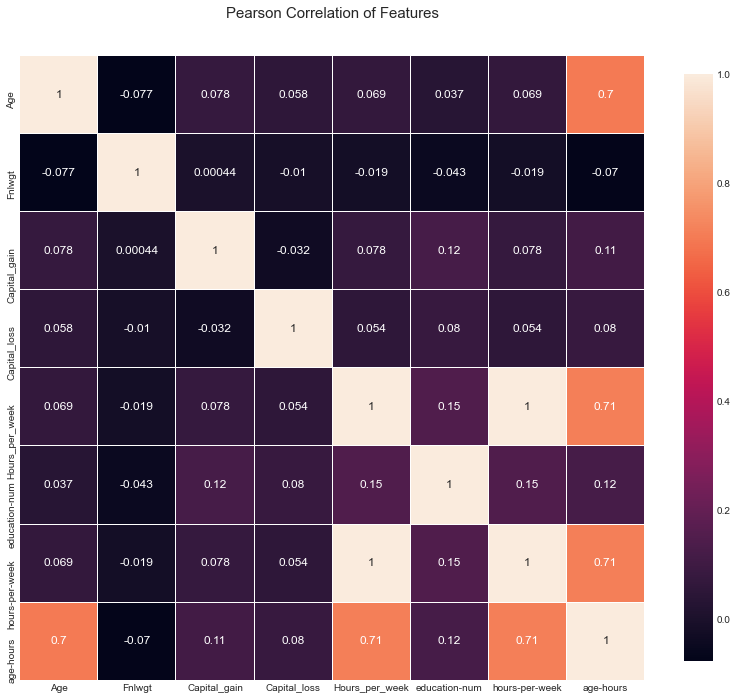

In [40]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(my_df)
plt.savefig('13.png')

### Bivariate Analysis

In [41]:
my_df.tail()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,predclass,education-num,age_bin,hours-per-week_bin,hours-per-week,age-hours,age-hours_bin
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,12,"(25.76, 28.68]","(30.4, 40.2]",38,1026,"(909.9, 1798.8]"
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,9,"(37.44, 40.36]","(30.4, 40.2]",40,1600,"(909.9, 1798.8]"
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,9,"(57.88, 60.8]","(30.4, 40.2]",40,2320,"(1798.8, 2687.7]"
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,9,"(19.92, 22.84]","(10.8, 20.6]",20,440,"(12.111, 909.9]"
32559,52,Self-emp-inc,287927,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,9,"(49.12, 52.04]","(30.4, 40.2]",40,2080,"(1798.8, 2687.7]"


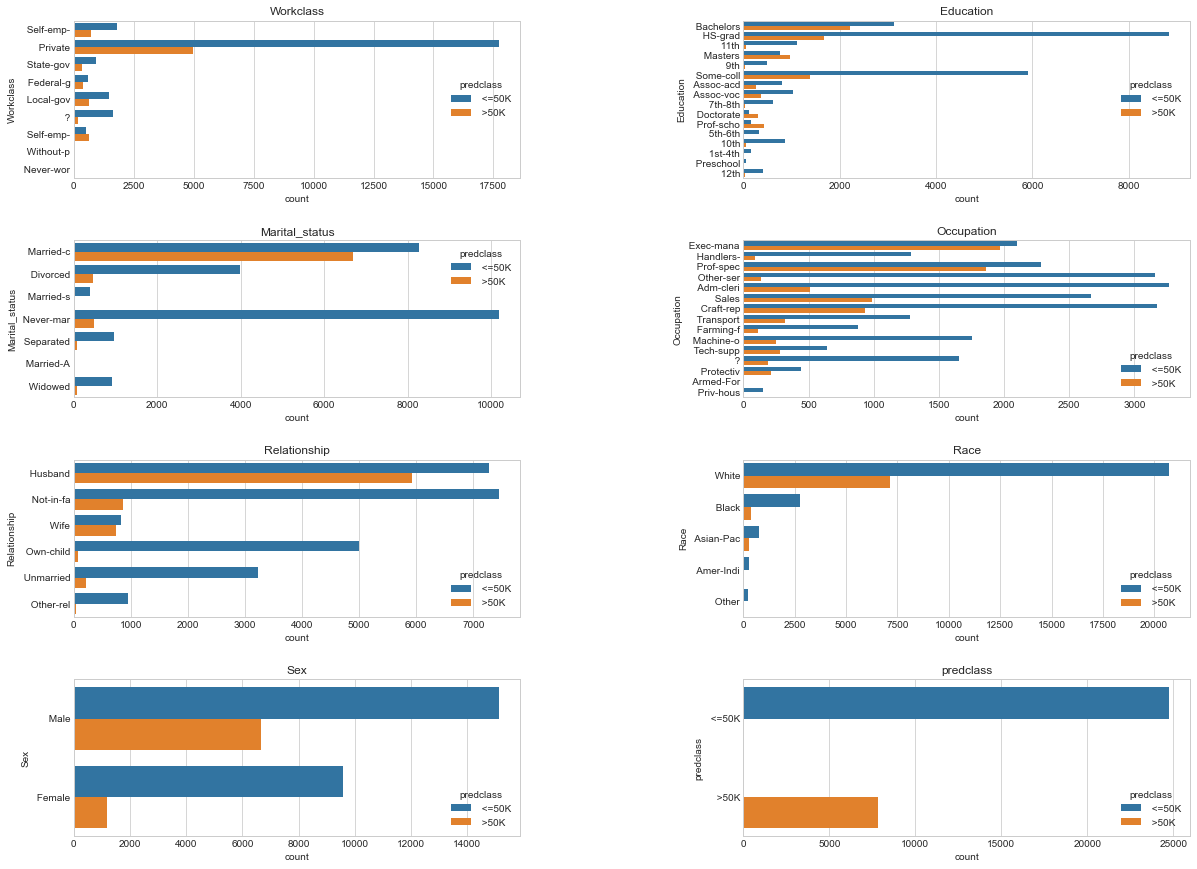

In [42]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['Workclass', 'Education', 
           'Marital_status', 'Occupation', 
           'Relationship', 'Race', 'Sex','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

plt.savefig('14.png')

A large number of jobs fall into the category of manual labor e.g., Handlers cleaners, craft repairers.
Executive managerial role and some one with a professional speciality has a high level payment.

### Occupation vs. Income Level

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

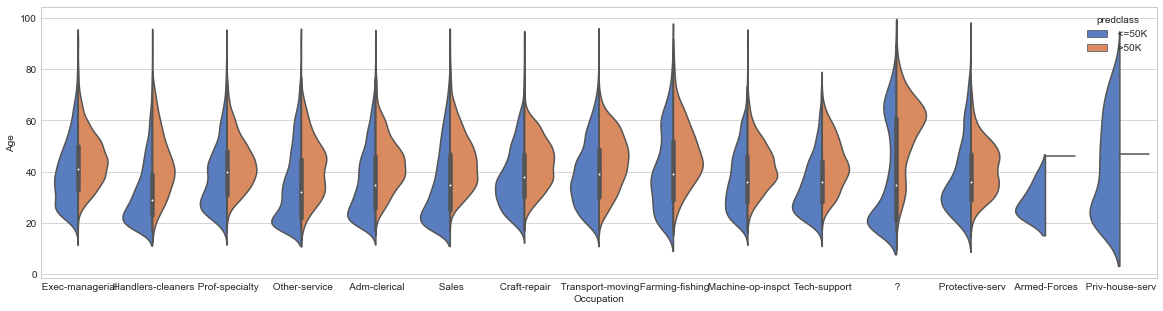

In [43]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Occupation", y="Age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

The general trend is in sync with common sense: more senior workers have higher salaries. Armed-forces don't have high job salaries.

Interestingly, private house sevice has the widest range of age variation. However, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs. 

### Race vs. Income Level

![censusrace](https://user-images.githubusercontent.com/31974451/36568899-8e25bc6c-17e0-11e8-9e85-53d0f5cc1d7f.png)


<AxesSubplot:xlabel='Race', ylabel='Age'>

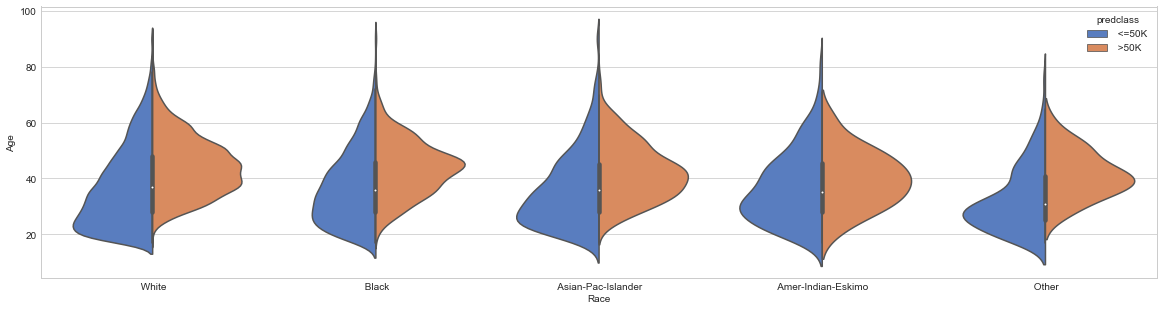

In [44]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Race", y="Age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

## Building Machine Learning Models

In [45]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
#from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

### Feature Encoding 

In [46]:
# Feature Selection and Encoding dependancies
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
# Training and testing data split dependancies
from sklearn.model_selection import train_test_split 

In [47]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,predclass,education-num,age_bin,hours-per-week_bin,hours-per-week,age-hours,age-hours_bin
0,33,6,2925,9,2,4,0,4,1,0,0,12,39,0,12,11,1,12,290,0
1,21,4,14085,11,0,6,1,4,1,0,0,39,39,0,8,7,3,39,620,1
2,36,4,15335,1,2,6,0,2,1,0,0,39,39,0,6,12,3,39,810,2
3,11,4,19354,9,2,10,5,2,0,0,0,39,5,0,12,3,3,39,477,1
4,20,4,17699,12,2,4,5,4,0,0,0,39,39,0,13,6,3,39,606,1


### Train-test split

In [48]:
drop_elements = ['Education', 'Native_country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,Age,Workclass,Fnlwgt,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,education-num,hours-per-week,age-hours
0,33,6,2925,2,4,0,4,1,0,0,12,12,12,290
1,21,4,14085,0,6,1,4,1,0,0,39,8,39,620
2,36,4,15335,2,6,0,2,1,0,0,39,6,39,810
3,11,4,19354,2,10,5,2,0,0,0,39,12,39,477
4,20,4,17699,2,4,5,4,0,0,0,39,13,39,606


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

### Without PCA

### Classification Models

#### Logistic Regression

In [50]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred_logreg = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The train accuracy of the Logistic Regression is', logreg.score(X_train,y_train))
print('The test accuracy of the Logistic Regression is', score_logreg)

The train accuracy of the Logistic Regression is 0.8081900081900082
The test accuracy of the Logistic Regression is 0.8160933660933661


#### K-Nearest Neighbors

In [51]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The train accuracy of the KNN Model is',knn.score(X_train,y_train))
print('The test accuracy of the KNN Model is',score_knn)

The train accuracy of the KNN Model is 0.8275593775593776
The test accuracy of the KNN Model is 0.7627764127764127


#### Gaussian Naive Bayes

In [52]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The train accuracy of Gaussian Naive Bayes is', gaussian.score(X_train,y_train))
print('The test accuracy of Gaussian Naive Bayes is', score_gaussian)

The train accuracy of Gaussian Naive Bayes is 0.8180999180999181
The test accuracy of Gaussian Naive Bayes is 0.8243243243243243


#### Decision Tree

In [53]:
# Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_decisiontree = decisiontree.score(X_test,y_test)
print('The train accuracy of Decision Tree is', decisiontree.score(X_train,y_train))
print('The test accuracy of Decision Tree is', score_decisiontree)

The train accuracy of Decision Tree is 1.0
The test accuracy of Decision Tree is 0.8085995085995086


#### Random Forest

In [54]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The train accuracy of the Random Forest Model is', randomforest.score(X_train,y_train))
print('The test accuracy of the Random Forest Model is', score_randomforest)

The train accuracy of the Random Forest Model is 1.0
The test accuracy of the Random Forest Model is 0.8567567567567568


#### Bagging

In [55]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
print('The train accuracy of the Bagging classifier model is', bag.score(X_train,y_train))
print('The test accuracy of the Bagging classifier Model is', bag.score(X_test,y_test))

The train accuracy of the Bagging classifier model is 0.9868140868140868
The test accuracy of the Bagging classifier Model is 0.8480343980343981


#### Boosting

In [57]:
#import the libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [58]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150
)
ada.fit(X_train, y_train)
print('The train accuracy of the Boosting classifier model is', ada.score(X_train,y_train))
print('The test accuracy of the Boosting classifier Model is', ada.score(X_test,y_test))

The train accuracy of the Boosting classifier model is 0.8672809172809173
The test accuracy of the Boosting classifier Model is 0.8689189189189189


In [59]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

print('The train accuracy of the Gradient Boosting classifier model is', gb_clf2.score(X_train,y_train))
print('The test accuracy of the Gradient Boosting classifier Model is', gb_clf2.score(X_test,y_test))

The train accuracy of the Gradient Boosting classifier model is 0.8556101556101556
The test accuracy of the Gradient Boosting classifier Model is 0.8576167076167076


In [60]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('The train accuracy of the XG Boosting classifier model is', xgb.score(X_train,y_train))
print('The test accuracy of the XG Boosting classifier Model is', xgb.score(X_test,y_test))

[22:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The train accuracy of the XG Boosting classifier model is 0.9136363636363637
The test accuracy of the XG Boosting classifier Model is 0.8714987714987715


### Cross Validation- w/o PCA

In [61]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest','Bagging','AdaBoost','Gradient Boost','XGBoost']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),BaggingClassifier(),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=150),GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

[22:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,CV Mean,Std
Naive Bayes,0.818612,0.003835
Logistic Regression,0.806910,0.004890
Decision Tree,0.808507,0.001974
KNN,0.766032,0.002639
Random Forest,0.855129,0.002093
Bagging,0.844226,0.001231
AdaBoost,0.865111,0.003610
Gradient Boost,0.856235,0.002520
XGBoost,0.869902,0.003776


Random Forest is the most accurate model.

### Principal Component Analysis (PCA)- w/o scaling

In [62]:
drop_elements = ['Education', 'Native_country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [63]:
pca = PCA(n_components=7)
pca.fit_transform(X)

array([[-7.57239110e+03, -3.43949064e+02, -3.96042757e-01, ...,
        -1.11163094e+00,  1.44596332e+00,  5.69237698e+00],
       [ 3.58671795e+03,  1.56961734e+01, -6.60061299e+00, ...,
        -2.33228407e+00,  4.57215953e-01, -1.29345682e+00],
       [ 4.83621972e+03,  2.09096896e+02, -9.38701315e+00, ...,
        -3.28979815e+00,  4.69655531e-01, -1.57958372e+00],
       ...,
       [-2.61691390e+03,  2.50828486e+02, -1.01047383e+01, ...,
        -3.64926073e+00,  5.29211468e+00, -2.13204558e+00],
       [ 2.38280496e+03, -4.05595893e+02,  1.13386087e-01, ...,
        -6.17191144e-01,  4.55322699e+00, -4.95969246e+00],
       [ 7.32524062e+03,  2.05238106e+02,  9.86101630e+01, ...,
         9.20025785e-01,  2.91659826e+00, -2.03180073e+00]])

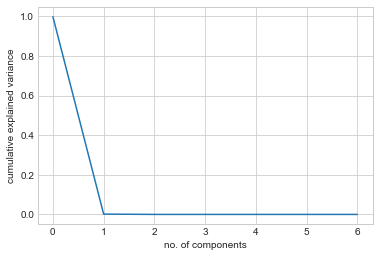

In [64]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [65]:
pca = PCA(n_components= 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Classification Models

#### Logistic Regression

In [66]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The train accuracy of the Logistic Regression is', logreg.score(X_train,y_train))
print('The test accuracy of the Logistic Regression is', score_logreg)

The train accuracy of the Logistic Regression is 0.7577933046683046
The test accuracy of the Logistic Regression is 0.7647420147420148


#### K-Nearest Neighbors

In [67]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The train accuracy of the KNN Model is',knn.score(X_train,y_train))
print('The test accuracy of the KNN Model is',score_knn)

The train accuracy of the KNN Model is 0.7939957002457002
The test accuracy of the KNN Model is 0.7235872235872236


#### Gaussian Naive Bayes

In [68]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The train accuracy of Gaussian Naive Bayes is', gaussian.score(X_train,y_train))
print('The test accuracy of Gaussian Naive Bayes is', score_gaussian)

The train accuracy of Gaussian Naive Bayes is 0.7577933046683046
The test accuracy of Gaussian Naive Bayes is 0.7647420147420148


#### Decision Tree

In [69]:
# Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_decisiontree = decisiontree.score(X_test,y_test)
print('The train accuracy of Decision Tree is', decisiontree.score(X_train,y_train))
print('The test accuracy of Decision Tree is', score_decisiontree)

The train accuracy of Decision Tree is 0.9950092137592138
The test accuracy of Decision Tree is 0.6673832923832924


#### Random Forest

In [70]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The train accuracy of the Random Forest Model is', randomforest.score(X_train,y_train))
print('The test accuracy of the Random Forest Model is', score_randomforest)

The train accuracy of the Random Forest Model is 0.9946253071253072
The test accuracy of the Random Forest Model is 0.6661547911547911


#### Bagging

In [71]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [72]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
print('The train accuracy of the Bagging classifier model is', bag.score(X_train,y_train))
print('The test accuracy of the Bagging classifier Model is', bag.score(X_test,y_test))

The train accuracy of the Bagging classifier model is 0.9536240786240786
The test accuracy of the Bagging classifier Model is 0.6807432432432432


#### Boosting

In [73]:
#import the libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [74]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150
)
ada.fit(X_train, y_train)
print('The train accuracy of the Boosting classifier model is', ada.score(X_train,y_train))
print('The test accuracy of the Boosting classifier Model is', ada.score(X_test,y_test))

The train accuracy of the Boosting classifier model is 0.7580620393120393
The test accuracy of the Boosting classifier Model is 0.7644348894348895


In [75]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

print('The train accuracy of the Gradient Boosting classifier model is', gb_clf2.score(X_train,y_train))
print('The test accuracy of the Gradient Boosting classifier Model is', gb_clf2.score(X_test,y_test))

The train accuracy of the Gradient Boosting classifier model is 0.758791461916462
The test accuracy of the Gradient Boosting classifier Model is 0.7638206388206388


In [76]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('The train accuracy of the XG Boosting classifier model is', xgb.score(X_train,y_train))
print('The test accuracy of the XG Boosting classifier Model is', xgb.score(X_test,y_test))

[22:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The train accuracy of the XG Boosting classifier model is 0.7625921375921376
The test accuracy of the XG Boosting classifier Model is 0.7621314496314496


### Cross Validation-PCA w/o scaling

In [77]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest','Bagging','AdaBoost','Gradient Boost','XGBoost']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),BaggingClassifier(),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=150),GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

[22:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,CV Mean,Std
Naive Bayes,0.818612,0.003835
Logistic Regression,0.806910,0.004890
Decision Tree,0.808385,0.001989
KNN,0.766032,0.002639
Random Forest,0.854392,0.002464
Bagging,0.846376,0.003190
AdaBoost,0.865111,0.003610
Gradient Boost,0.856235,0.002520
XGBoost,0.869902,0.003776


### Principal Component Analysis (PCA)

In [78]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [79]:
drop_elements = ['Education', 'Native_country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']

y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [80]:
data_scaled = pd.DataFrame(preprocessing.scale(X),columns=X.columns)

In [81]:
pca = PCA(n_components=7)
pca.fit_transform(data_scaled)

array([[-1.6771659 ,  2.51862775, -1.70962894, ...,  0.33827811,
         0.16463405, -0.76691145],
       [ 0.53381691,  0.74230224, -0.43639155, ...,  0.07678986,
        -0.48359895, -0.09338279],
       [ 0.83029386,  1.03644235,  0.24581271, ...,  0.34356769,
        -1.5857939 ,  1.8777315 ],
       ...,
       [-0.64174663, -0.17966369,  2.35384961, ...,  0.35576987,
        -0.28028696, -0.6468904 ],
       [-3.21754706,  0.43519493, -0.89830271, ..., -0.37454286,
         0.38584591, -0.39040343],
       [ 0.17817821,  0.09322503,  1.88856804, ..., -2.77613684,
        -0.47196696,  0.58794196]])

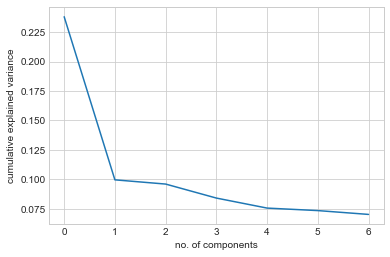

In [82]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [83]:
pca = PCA(n_components= 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Classification Models

#### Logistic Regression

In [84]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The train accuracy of the Logistic Regression is', logreg.score(X_train,y_train))
print('The test accuracy of the Logistic Regression is', score_logreg)

The train accuracy of the Logistic Regression is 0.7882371007371007
The test accuracy of the Logistic Regression is 0.7874692874692875


#### K-Nearest Neighbors

In [85]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The train accuracy of the KNN Model is',knn.score(X_train,y_train))
print('The test accuracy of the KNN Model is',score_knn)

The train accuracy of the KNN Model is 0.8266277641277642
The test accuracy of the KNN Model is 0.7533783783783784


#### Gaussian Naive Bayes

In [86]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The train accuracy of Gaussian Naive Bayes is', gaussian.score(X_train,y_train))
print('The test accuracy of Gaussian Naive Bayes is', score_gaussian)

The train accuracy of Gaussian Naive Bayes is 0.7863559582309583
The test accuracy of Gaussian Naive Bayes is 0.7900798525798526


#### Decision Tree

In [87]:
# Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_decisiontree = decisiontree.score(X_test,y_test)
print('The train accuracy of Decision Tree is', decisiontree.score(X_train,y_train))
print('The test accuracy of Decision Tree is', score_decisiontree)

The train accuracy of Decision Tree is 1.0
The test accuracy of Decision Tree is 0.7328009828009828


#### Random Forest

In [88]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The train accuracy of the Random Forest Model is', randomforest.score(X_train,y_train))
print('The test accuracy of the Random Forest Model is', score_randomforest)

The train accuracy of the Random Forest Model is 0.9999616093366094
The test accuracy of the Random Forest Model is 0.793918918918919


#### Bagging

In [89]:
# Bagged Decision Trees for Classification - necessary dependencies
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
print('The train accuracy of the Bagging classifier model is', bag.score(X_train,y_train))
print('The test accuracy of the Bagging classifier Model is', bag.score(X_test,y_test))

The train accuracy of the Bagging classifier model is 0.9804591523341524
The test accuracy of the Bagging classifier Model is 0.7916154791154791


#### Boosting

In [91]:
#import the libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [92]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150
)
ada.fit(X_train, y_train)
print('The train accuracy of the Boosting classifier model is', ada.score(X_train,y_train))
print('The test accuracy of the Boosting classifier Model is', ada.score(X_test,y_test))

The train accuracy of the Boosting classifier model is 0.8042076167076168
The test accuracy of the Boosting classifier Model is 0.8065110565110565


In [93]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

print('The train accuracy of the Gradient Boosting classifier model is', gb_clf2.score(X_train,y_train))
print('The test accuracy of the Gradient Boosting classifier Model is', gb_clf2.score(X_test,y_test))

The train accuracy of the Gradient Boosting classifier model is 0.8093519656019657
The test accuracy of the Gradient Boosting classifier Model is 0.8098894348894349


In [94]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('The train accuracy of the XG Boosting classifier model is', xgb.score(X_train,y_train))
print('The test accuracy of the XG Boosting classifier Model is', xgb.score(X_test,y_test))

[22:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The train accuracy of the XG Boosting classifier model is 0.8435580466830467
The test accuracy of the XG Boosting classifier Model is 0.8132678132678133


### Cross Validation- PCA w/ scaling

In [95]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest','Bagging','AdaBoost','Gradient Boost','XGBoost']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),BaggingClassifier(),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=150),GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

[22:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,CV Mean,Std
Naive Bayes,0.818612,0.003835
Logistic Regression,0.806910,0.004890
Decision Tree,0.808630,0.002690
KNN,0.766032,0.002639
Random Forest,0.853225,0.002118
Bagging,0.845240,0.002539
AdaBoost,0.865111,0.003610
Gradient Boost,0.856235,0.002520
XGBoost,0.869902,0.003776


#### Best Model

### Cross Validation

In [96]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

,CV Mean,Std
Naive Bayes,0.818612,0.003835
Logistic Regression,0.806910,0.004890
Decision Tree,0.809244,0.002239
KNN,0.766032,0.002639
Random Forest,0.853993,0.001926


#### Random Forest is the most accurate model.

In [97]:
best_model = RandomForestClassifier(n_estimators=100)

In [98]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [99]:
best_model.score(X_test,y_test)

0.7986793611793612

In [100]:
# saving the best model
import joblib
joblib.dump(best_model,'CensusIncome.pkl')

['CensusIncome.pkl']